In [81]:
import pandas as pd                     # Data Processing
import matplotlib.pyplot as plt         # Visualization
import plotly.express as px             # Visualization
import plotly.graph_objects as go       # Visualization
import plotly.io as pio                 # Visualization
import plotly.colors as colors          # Visualization
pio.templates.default = "plotly_white"  # Visualization
import seaborn as sns                   # Visualization

In [82]:
# Read the files of both test and train data
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [83]:
# Find general information regarding test data
print(test_data.head)
print(test_data.shape)
print(test_data.columns)

<bound method NDFrame.head of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0     

In [84]:
# Determine null values within data set
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [85]:
# Delete rows with null values within data set
test_data = test_data.dropna()

In [86]:
train_data = train_data.dropna()

In [87]:
# Ensure that all rows with null values have been deleted
print(test_data.shape)
test_data.isnull().sum()

(289, 12)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [88]:
# Display statistics regarding the gender of all loan applicants using pie chart

genderCount = test_data.groupby(['Gender']).size()
Gender = ['Male','Female']
genderFig = px.pie(genderCount, 
                   values=genderCount, 
                   names=['Female','Male'], 
                   hole = .5, 
                   color_discrete_sequence=px.colors.qualitative.Pastel)
genderFig.update_traces( textposition = 'inside', textinfo = 'percent+label+value')
genderFig.update_layout(title_text='Gender of Loan Applicants', title_font=dict(size=24))
genderFig.show()

In [89]:
# Display married status of applicants with pie chart
married = test_data.groupby(['Married']).size()
genderFig = px.pie(married, 
                   values=married, 
                   names=['No','Yes'], 
                   hole = .5, 
                   color_discrete_sequence=px.colors.qualitative.Pastel)
genderFig.update_traces( textposition = 'inside', textinfo = 'percent+label+value')
genderFig.update_layout(title_text='Married Status of Loan Applicants', title_font=dict(size=24))
genderFig.show()

In [90]:
# Display number of dependants using a bar graph
numDependants = test_data.groupby(['Dependents']).size()
print(numDependants)


fig = px.bar(numDependants, title='Number of Dependants of Applicants', labels={'Number of Dependents','Number of Applicants'})
fig.update_layout(xaxis_title = 'Number of Dependents', yaxis_title = 'Number of Applicants', showlegend = False)


Dependents
0     167
1      42
2      50
3+     30
dtype: int64


In [91]:
# Display graduated status or not by pie chart

gradStatus = test_data.groupby(['Education']).size()
gradFig = px.pie(gradStatus,  
                   names=['Graduate','Non-Graduate'], 
                   values=gradStatus,
                   hole = .5, 
                   color_discrete_sequence=px.colors.qualitative.Pastel)
gradFig.update_traces( textposition = 'inside', textinfo = 'percent+label+value')
gradFig.update_layout(title_text='Graduate Status of Loan Applicants', title_font=dict(size=24))
gradFig.show()

In [92]:
# Create pie chart for self employed status
selfEmployedStatus = test_data.groupby(['Self_Employed']).size()
gradFig = px.pie(selfEmployedStatus,  
                   names=['Non Self-Employed','Self-Semployed'], 
                   values=selfEmployedStatus,
                   hole = .5, 
                   color_discrete_sequence=px.colors.qualitative.Pastel)
gradFig.update_traces( textposition = 'inside', textinfo = 'percent+label+value')
gradFig.update_layout(title_text='Self-Employed Status of Loan Applicants', title_font=dict(size=24))
gradFig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


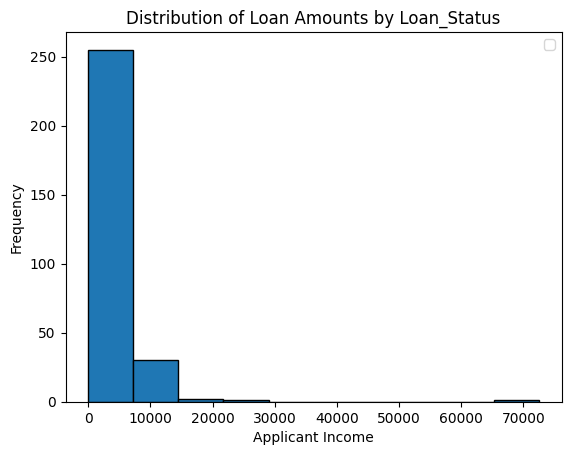

In [93]:
# Creatiing a Histogram of Distribution of Applicant Income
applicant_income = test_data['ApplicantIncome']

plt.hist(applicant_income, bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
# plt.show()unt')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts by Loan_Status')
plt.legend()  # Show the legend to distinguish the two histograms
plt.show()

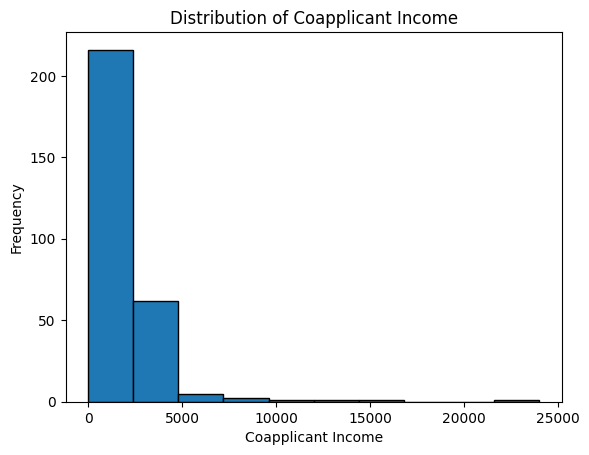

In [94]:
# Creatiing a Histogram of Distribution of Coapplicant Income
coapplicant_income = test_data['CoapplicantIncome']
plt.hist(coapplicant_income, bins=10, edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()

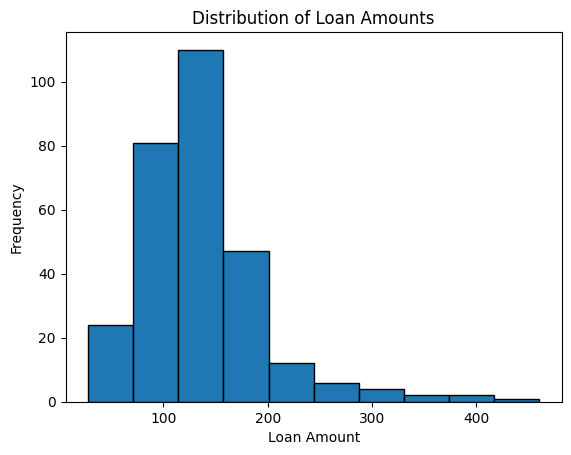

In [95]:
# Creatiing a Histogram of Distribution of Loan Amounts
loan_amount = test_data['LoanAmount']
plt.hist(loan_amount, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

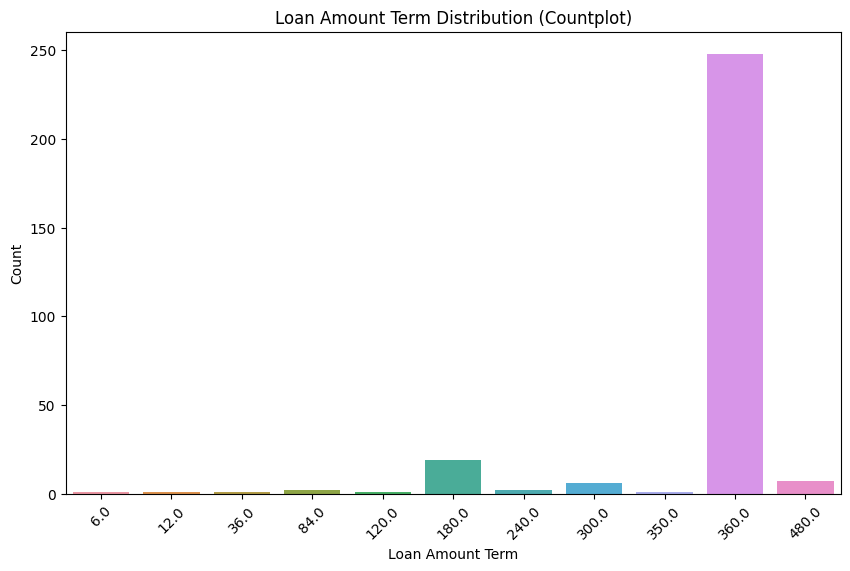

In [96]:
#Creating a Countplot of Distribution of Loan Amount Terms
loan_amount_term = test_data['Loan_Amount_Term']
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_amount_term)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Loan Amount Term Distribution (Countplot)')
plt.xticks(rotation=45)
plt.show()

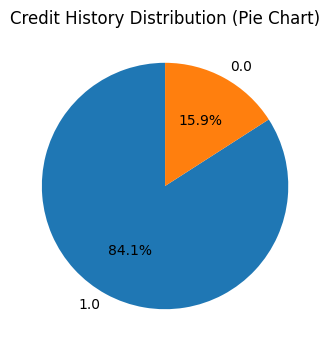

In [97]:
#Creating a Piechart of Distribution of Loan Amount Terms
credit_history = test_data['Credit_History']
credit_history_counts = credit_history.value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit History Distribution (Pie Chart)')
plt.show()

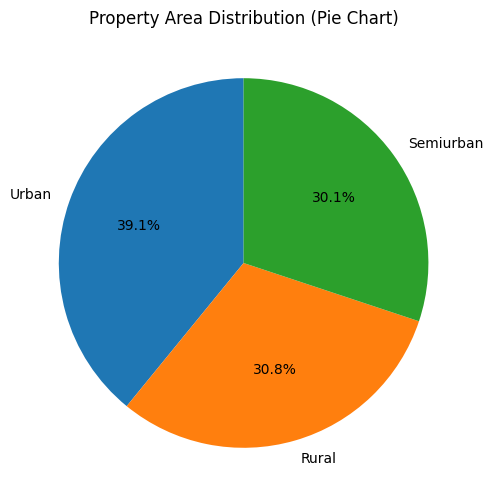

In [98]:
# Creatiing a Piechart of Distribution of Property Areas
property_area = test_data['Property_Area']
property_area_counts = property_area.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Property Area Distribution (Pie Chart)')
plt.show()

Train a machine learning model to read our data

In [99]:
# Examine head, shape, and columns of train data
print(train_data.shape)
print(train_data.columns)
train_data.info

(480, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583          

In [100]:
# Drop the Loan ID from the train data, not relevant

# Create categorical and numerical columns to train model
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Seperate the target variable and drop it from the train data
loanStatus = train_data['Loan_Status']
train_data = train_data.drop(['Loan_Status','Loan_ID'], axis=1)
train

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [102]:
oder = OneHotEncoder()

gender_data = train_data['Gender']


data_encoded = pd.get_dummies(gender_data, columns=['Gender'], drop_first=True)
data_encoded = data_encoded.astype(int)

print(data_encoded)

     Male
1       1
2       1
3       1
4       1
5       1
..    ...
609     0
610     1
611     1
612     1
613     0

[480 rows x 1 columns]


In [103]:
encoder = OneHotEncoder()

property_data = train_data['Property_Area']
data_encoded = pd.get_dummies(property_data, columns=['Property_Data'])
data_encoded = data_encoded.astype(int)

print(data_encoded)

     Rural  Semiurban  Urban
1        1          0      0
2        0          0      1
3        0          0      1
4        0          0      1
5        0          0      1
..     ...        ...    ...
609      1          0      0
610      1          0      0
611      0          0      1
612      0          0      1
613      0          1      0

[480 rows x 3 columns]


In [104]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

ohe_X=pd.DataFrame(encoder.fit_transform(train_data[categorical_columns]))
ohe_X.columns=encoder.get_feature_names_out(categorical_columns)
train_data.drop(categorical_columns,axis=1,inplace=True)
ohe_X.index=train_data.index
train_data=pd.concat([train_data,ohe_X],axis=1)

train_data.head()


c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Credit_History_1.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
1,4583,1508.0,128.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2583,2358.0,120.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000,0.0,141.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5417,4196.0,267.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
# categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
# data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
# print(data_encoded)


In [106]:
train_data.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0.0         0
Credit_History_1.0         0
Loan_Amount_Term_36.0      0
Loan_Amount_Term_60.0      0
Loan_Amount_Term_84.0      0
Loan_Amount_Term_120.0     0
Loan_Amount_Term_180.0     0
Loan_Amount_Term_240.0     0
Loan_Amount_Term_300.0     0
Loan_Amount_Term_360.0     0
Loan_Amount_Term_480.0     0
dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data_encoded' is your DataFrame with all the encoded features, and 'loanStatus' is the target variable
X = data_encoded
y = loanStatus

# Step 1: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a machine learning algorithm and create an instance of the model
model = RandomForestClassifier(random_state=42)

# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        28
           Y       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

